## Antes de entrenar un modelo, aprendamos sobre el funcionamiento y la API de scikit-learn

In [1]:
import numpy as np 
import pandas as pd

Scikit-learn es la librería más usada de Machine Learning tradicional [Ver ranking de Github](https://github.com/showcases/machine-learning). La librería incluye funcionalidades de:

- Preprocesamiento de datos en  sklearn.preprocessing 

- Algoritmos de Machine Learning en sklearn.linear_model, sklearn.svm, sklearn.ensemble, y muchos más.

- Evaluación de modelos en sklearn.model_selection y sklearn.metrics

Scikit-learn sigue muy de cerca los resultados de la investigación e implementa los resultados más maduros y probados en sus modulos. La [documentación](http://scikit-learn.org/stable/modules/ensemble.html#forests-of-randomized-trees) extensa muestra como la librería es un compendio de conocimiento en Machine Learning llevado a software

Una estructura de datos esencial en scikit-learn es el Estimator

![Texto alternativo](./documents/estimator.png)

Para poder escoger el estimator apropiado una excelente guia es el cheatsheet siguiente, hecho por uno de los core-dev de scikit-learn.

## Implementamos un modelo simple de regresion 

In [2]:
X = pd.read_csv('./documents/X.csv')

In [3]:
X.head()

,production_budget,worldwide_gross,title_year,aspect_ratio,duration.1,cast_total_facebook_likes,budget,imdb_score
0,425000000.0,2.783919e+09,2.009000e+03,1.780000e+00,1.780000e+02,4834.0,2.370000e+08,7.9
1,306000000.0,2.058662e+09,5.911656e+08,5.911656e+08,5.911656e+08,143.0,5.911656e+08,7.1
2,300000000.0,9.634204e+08,2.007000e+03,2.350000e+00,1.690000e+02,48350.0,3.000000e+08,7.1
3,300000000.0,8.796209e+08,2.015000e+03,2.350000e+00,1.480000e+02,11700.0,2.450000e+08,6.8
4,275000000.0,1.084439e+09,2.012000e+03,2.350000e+00,1.640000e+02,106759.0,2.500000e+08,8.5


In [4]:
Y = X['worldwide_gross']

In [5]:
X = X.drop('worldwide_gross', axis=1)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4)

In [7]:
print(len(X))
print(len(X_train))
print(len(X_test))

4104
2462
1642


In [8]:
X.head(1)

,production_budget,title_year,aspect_ratio,duration.1,cast_total_facebook_likes,budget,imdb_score
0,425000000.0,2009.0,1.78,178.0,4834.0,237000000.0,7.9


In [9]:
from sklearn.linear_model import Lasso
model = Lasso()

In [10]:
model.fit(X_train, Y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [11]:
predicted = model.predict(X_test)

In [12]:
predicted.shape

(1642,)

([array([1.192e+03, 3.600e+02, 6.100e+01, 2.400e+01, 4.000e+00, 0.000e+00,
         0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00]),
  array([1.272e+03, 2.570e+02, 6.100e+01, 2.600e+01, 1.400e+01, 1.000e+01,
         0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00])],
 array([-1.00150592e+08,  1.15730690e+08,  3.31611971e+08,  5.47493253e+08,
         7.63374535e+08,  9.79255816e+08,  1.19513710e+09,  1.41101838e+09,
         1.62689966e+09,  1.84278094e+09,  2.05866222e+09]),
 <a list of 2 Lists of Patches objects>)

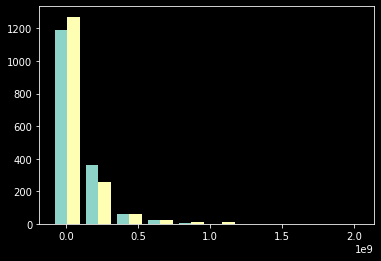

In [13]:
import matplotlib.pyplot as plt 
%matplotlib inline
plt.style.use('dark_background')
plt.hist([predicted, Y_test])

## Evaluamos de forma mas fina el comportamiento de nuestro modelo

Los estimadores y las funciones de sklearn vienen con el máximo de argumentos con valores por defecto que suelen ser las mejores opciones si no tenemos algun conocimiento particular el problema. En este caso particular la función `estimator.score` ya viene con una de las métricas de `sklearn.metrics`, que es la métrica `sklearn.metric.r2_score`

El **score R2** de una regresión es una de las formas más comunes de entender su poder predictivo. Este **mientras más cerca de 1 este, mejor es**

Los valores que puede tomar son de -infinito hasta 1. Un score R2 negativo es malo, ya que esto indica que la regresión es peor que si simplemente eligieramos un valor fijo como predicción para todos los puntos, la media.

In [14]:
model.score(X_test, Y_test)

0.6433129187657702

Bastante bien para un primer modelo!

Un buen score R2 es importante para una regresión. Pero no lo es todo. De forma general los scores hay que complementarlos con visualizaciones de los datos ya que una métrica no logra siempre encodear todas las caracteristicas de una distribución de probabilidades.

**Siempre visualiza tus resultados**, aunque tengas un buen score de performance.

In [15]:
residuals = Y_test - predicted

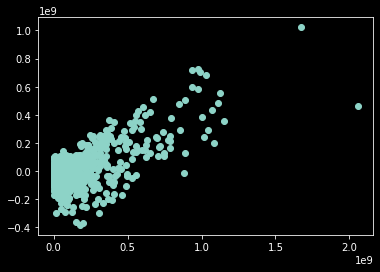

In [17]:
plt.style.use('dark_background')
plt.scatter(Y_test, residuals)

In [18]:
ap_residuals = np.abs(residuals) / Y_test

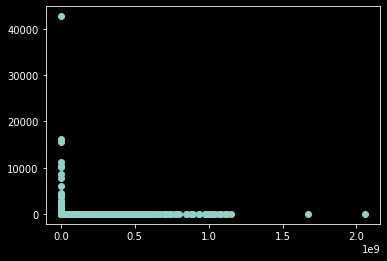

In [19]:
plt.scatter(Y_test, ap_residuals)

In [20]:
lap_resudials = np.log(ap_residuals)

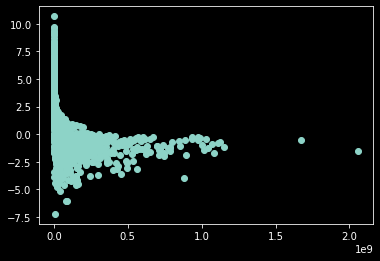

In [22]:
plt.scatter(Y_test, lap_resudials)

(array([6.09013398e-04, 6.09013398e-04, 6.09013398e-04, 6.09013398e-04,
        6.09013398e-04, 6.09013398e-04, 1.82704019e-03, 1.82704019e-03,
        1.82704019e-03, 1.82704019e-03, 1.82704019e-03, 2.43605359e-03,
        2.43605359e-03, 3.04506699e-03, 4.26309379e-03, 6.69914738e-03,
        9.74421437e-03, 1.33982948e-02, 1.70523752e-02, 2.00974421e-02,
        2.31425091e-02, 2.55785627e-02, 3.04506699e-02, 3.41047503e-02,
        4.01948843e-02, 4.93300853e-02, 6.39464068e-02, 7.12545676e-02,
        8.16077954e-02, 9.68331303e-02, 1.21193666e-01, 1.47381242e-01,
        1.78440926e-01, 2.21071864e-01, 2.61266748e-01, 2.96589525e-01,
        3.45919610e-01, 3.96467722e-01, 4.54933009e-01, 4.93909866e-01,
        5.32886724e-01, 5.67600487e-01, 6.03532278e-01, 6.33982948e-01,
        6.66869671e-01, 6.91230207e-01, 7.18635810e-01, 7.46650426e-01,
        7.71619976e-01, 7.91108404e-01, 8.12423873e-01, 8.23386114e-01,
        8.38611449e-01, 8.55054811e-01, 8.67235079e-01, 8.769792

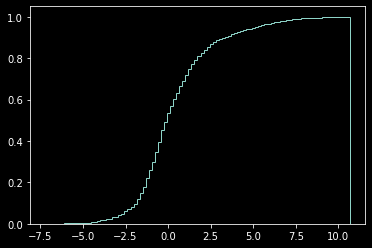

In [23]:
# Funcion cumulativa
plt.hist(lap_resudials, bins=100, normed=1, histtype='step', cumulative=True)

array([0.13533528, 0.22313016, 0.36787944, 0.60653066, 1.        ])

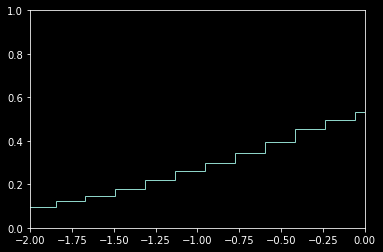

In [24]:
plt.hist(lap_resudials, bins=100, normed=1, histtype='step', cumulative=True)
plt.axis([-2, 0, 0, 1])
np.power(np.exp(1)*np.ones(5), np.linspace(-2, 0, 5))